In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import math
import gc
import time


from IPython.display import clear_output

from sklearn.metrics import roc_auc_score

import lightgbm as lgbm

import pickle
def dump_pkl(data, filename):
  with open(filename, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pkl(filename):
  with open(filename, 'rb') as handle:
    data = pickle.load(handle)
  return data



# #Analyze

In [29]:
!mkdir data data/raw data/raw/1hour

mkdir: data: File exists
mkdir: data/raw: File exists
mkdir: data/raw/1hour: File exists


In [139]:
import okx.MarketData as MarketData


def get_all_candles(ticker=None, start=None, end=None, interval=None):

    start_utc = (start - pd.Timedelta(hours=3)).value // 1000000  #3hour-utc
    end_utc = (end - pd.Timedelta(hours=3)).value // 1000000  #3hour-utc
    
    flag = "0"  # Production trading:0 , demo trading:1
    marketDataAPI =  MarketData.MarketAPI(flag=flag)

    times = []
    opens = []
    highs = []
    lows = []
    closes = []
    volumes = []
    
    cur_time_utc = end_utc
    while cur_time_utc > start_utc:
        try:
            clear_output()
            print(ticker, pd.to_datetime([cur_time_utc], unit='ms') + pd.Timedelta(hours=3))

            
            response = marketDataAPI.get_history_candlesticks(ticker, bar=interval, after=cur_time_utc, limit=100) 
            if response['code'] == '0':
                for elem in response['data']:
                        times += [elem[0]]
                        opens += [elem[1]]
                        highs += [elem[2]]
                        lows += [elem[3]]
                        closes += [elem[4]]
                        volumes += [elem[5]]
                cur_time_utc = int(times[-1])

            if (response['code'] == '0') and (len(response['data']) == 0): #акции не так давно запущенные
                break 
            if response['code'] != '0':
                time.sleep(1)
                
        except:
            time.sleep(1)
            

    df = pd.DataFrame({'time' : times,
                      'close' : closes,
                       'open' : opens,
                       'high' : highs,
                       'low' : lows,
                      'volume' : volumes,
                        })
    
    df['time'] = pd.to_datetime(df['time'].astype(int), unit='ms') + pd.Timedelta(hours=3)
    df['close'] = df['close'].astype(np.float64)
    df['open'] = df['open'].astype(np.float64)
    df['high'] = df['high'].astype(np.float64)
    df['low'] = df['low'].astype(np.float64)
    df['volume'] = df['volume'].astype(np.float64)
    df['ticker'] = ticker

    df = df[df['time'] >= start]
    df = df.sort_values(by='time').reset_index(drop=True)

    return df

    

In [627]:
stocks = ['TON-USDT',
          'NEAR-USDT',
        'BTC-USDT',
         'ETH-USDT',
         'ETC-USDT',
         'XRP-USDT',
         'BNB-USDT',
         'SOL-USDT',
         'DOGE-USDT',
         'ADA-USDT',
         'TRX-USDT',
         'LINK-USDT', 
         'AVAX-USDT', 
         'SUI-USDT',
         'XLM-USDT',
         'LTC-USDT',
         
         'SHIB-USDT',
         'HBAR-USDT',
         'DOT-USDT',
         'BCH-USDT',
         'OP-USDT', 
         
         'AAVE-USDT',
         'LDO-USDT',
         'ARB-USDT',
         'UNI-USDT',
         'ATOM-USDT', #26
         ]

start = pd.Timestamp("2024-01-01")
end = pd.Timestamp("2025-06-01") # не включительно

#
len(stocks)

26

In [631]:
#1hour
for stock in tqdm(stocks):
    data = get_all_candles(ticker=stock,
                               start=start,
                               end=end,
                               interval='1H') #5m, 1H, 1Dutc

    dump_pkl(data, f"./data/raw/1hour/{stock}.pkl")

BTC-USDT DatetimeIndex(['2024-09-24 11:00:00'], dtype='datetime64[ns]', freq=None)


  8%|█████▋                                                                    | 2/26 [01:25<17:02, 42.62s/it]


KeyboardInterrupt: 

In [8]:
#Отсюда читать ноутбук и до Daemon

### 1. STOCKS

In [11]:
stocks = ['ABIO',
 'AFKS',
 'AFLT',
 'ALRS',
 'APTK',
 'AQUA',
 'BANE',
 'BANEP',
 'BELU',
 'BSPB',
 'CBOM',
 'CHMF',
 'ENPG',
 'FEES',
 'FESH',
 'FLOT',
 'GAZP',
 'GMKN',
 'GTRK',
 'HEAD',
 'HYDR',
 'IRAO',
 'IRKT',
 'KMAZ',
 'LENT',
 'LIFE',
 'LKOH',
 'LSRG',
 'MAGN',
 'MDMG',
 'MGNT',
 'MOEX',
 'MTLR',
 'MTLRP',
 'MTSS',
 'MVID',
 'NLMK',
 'NMTP',
 'NVTK',
 'OGKB',
 'PHOR',
 'PIKK',
 'PLZL',
 'POSI',
 'RASP',
 'RENI',
 'RNFT',
 'ROSN',
 'RTKM',
 'RTKMP',
 'RUAL',
 'SBER',
 'SBERP',
 'SELG',
 'SFIN',
 'SGZH',
 'SIBN',
 'SMLT',
 'SNGS',
 'SNGSP',
 'SPBE',
 'SVAV',
 'T',
 'TATN',
 'TATNP',
 'TGKN',
 'TRMK',
 'TRNFP',
 'UNAC',
 'UPRO',
 'UWGN',
 'VKCO',
 'VSMO',
 'VTBR',
 'WUSH',
 'YDEX',


#'TMOS',
]

len(stocks)

76

In [112]:
ticker1 = 'CHMF'
ticker2 = 'MAGN'

df1 = load_pkl(f'./data/raw/1hour/{ticker1}.pkl')
df2 = load_pkl(f'./data/raw/1hour/{ticker2}.pkl')


df1[ticker1] = df1['close']
df2[ticker2] = df2['close']

df = df1.merge(df2, on='time', how='inner')[['time', ticker1, ticker2]]
df['time'] = df['time'].apply(lambda x: x.tz_convert(None))

df[f'{ticker1}/{ticker2}'] = df[ticker1]/df[ticker2]

window = 24*1
df[f'{ticker1}/{ticker2}_ma_Wx'] = df[f'{ticker1}/{ticker2}'].rolling(window=window, min_periods=window).mean().values
window = 24*3
df[f'{ticker1}/{ticker2}_ma_Wy'] = df[f'{ticker1}/{ticker2}'].rolling(window=window, min_periods=window).mean().values

df

time    CHMF    MAGN  CHMF/MAGN  CHMF/MAGN_ma_Wx  \
0     2022-07-01 09:00:00   829.6  32.000  25.925000              NaN   
1     2022-07-01 10:00:00   826.2  31.870  25.924067              NaN   
2     2022-07-01 11:00:00   832.8  31.755  26.225791              NaN   
3     2022-07-01 12:00:00   837.6  32.080  26.109726              NaN   
4     2022-07-01 13:00:00   848.0  32.380  26.189006              NaN   
...                   ...     ...     ...        ...              ...   
13552 2025-03-06 08:00:00  1345.6  41.140  32.707827        33.322274   
13553 2025-03-06 09:00:00  1343.4  41.025  32.745887        33.288850   
13554 2025-03-06 10:00:00  1348.2  41.010  32.874909        33.254957   
13555 2025-03-06 11:00:00  1347.0  40.795  33.018752        33.221969   
13556 2025-03-06 12:00:00  1350.6  40.830  33.078619        33.191475   

       CHMF/MAGN_ma_Wy  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
13552        33.893810  
13553        33.874786  
13554        33.856027  
13555        33.836361  
13556        33.818377  

[13557 rows x 6 columns]

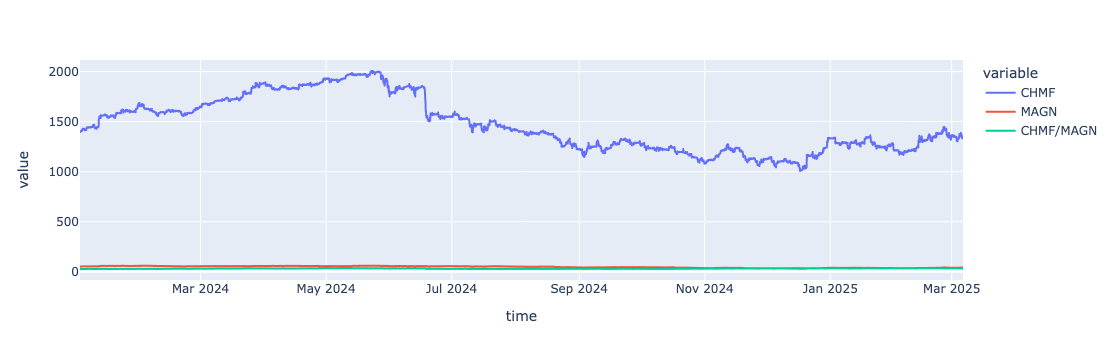

In [114]:
import plotly.express as px
#mask = df['time'] >= pd.Timestamp('2024-01-01')
mask = df['time'] >= pd.Timestamp('2024-01-01')

px.line(df.loc[mask, ['time',ticker1, ticker2, f'{ticker1}/{ticker2}']].set_index('time'))

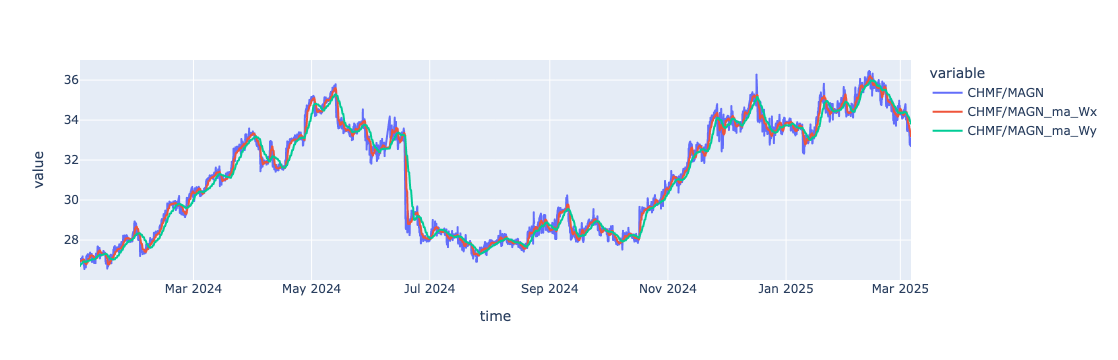

In [116]:
px.line(df.loc[mask, ['time',f'{ticker1}/{ticker2}', f'{ticker1}/{ticker2}_ma_Wx', f'{ticker1}/{ticker2}_ma_Wy']].set_index('time'))

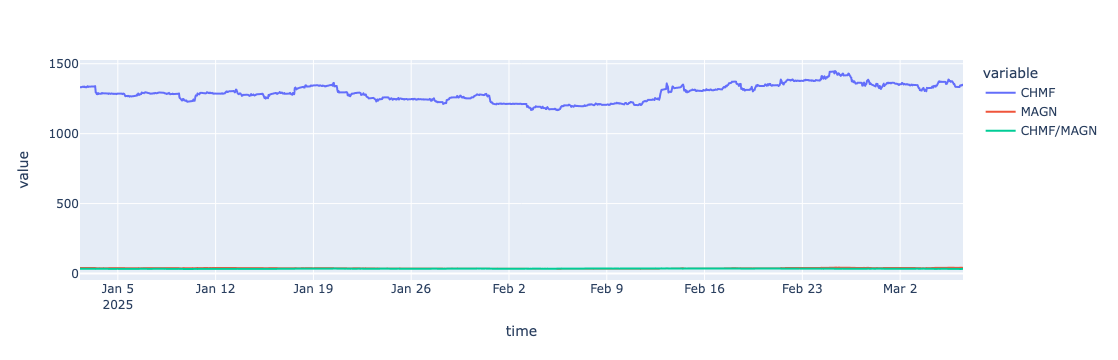

In [119]:
import plotly.express as px
#mask = df['time'] >= pd.Timestamp('2024-01-01')
mask = df['time'] >= pd.Timestamp('2025-01-01')

px.line(df.loc[mask, ['time',ticker1, ticker2, f'{ticker1}/{ticker2}']].set_index('time'))

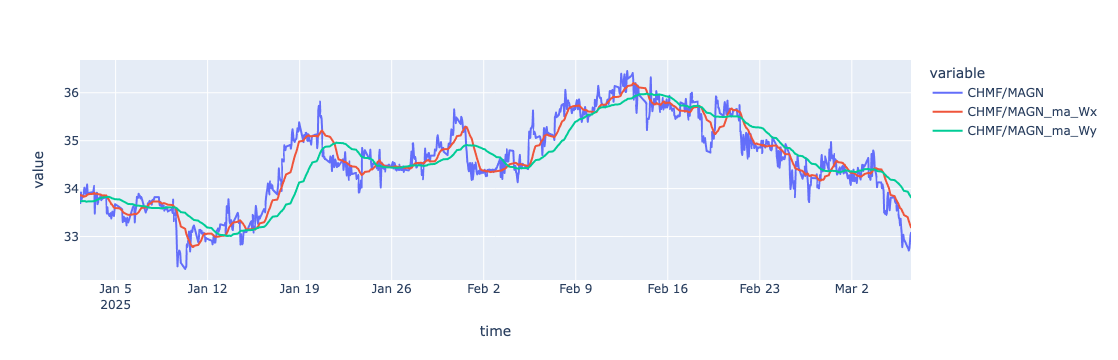

In [121]:
px.line(df.loc[mask, ['time',f'{ticker1}/{ticker2}', f'{ticker1}/{ticker2}_ma_Wx', f'{ticker1}/{ticker2}_ma_Wy']].set_index('time'))

In [125]:
35/33

1.0606060606060606

In [ ]:
#до 500 тыс. комиссия 3% в месяц. Пипец

In [54]:
df.loc[mask, [f'{ticker1}/{ticker2}']].quantile(q=[0, 0.01, 0.05]+np.arange(0.1, 1, 0.1).tolist()+[0.95, 0.99, 1])

YDEX/T
0.00  1.324341
0.01  1.329104
0.05  1.333928
0.10  1.335982
0.20  1.340134
0.30  1.343741
0.40  1.347543
0.50  1.350816
0.60  1.353710
0.70  1.358274
0.80  1.373015
0.90  1.435977
0.95  1.451282
0.99  1.458752
1.00  1.465782

# #Daemon

In [581]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import math
import gc
import time


from IPython.display import clear_output

from sklearn.metrics import roc_auc_score

import lightgbm as lgbm

import pickle
def dump_pkl(data, filename):
  with open(filename, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pkl(filename):
  with open(filename, 'rb') as handle:
    data = pickle.load(handle)
  return data



In [583]:
import okx.MarketData as MarketData


def get_all_candles(ticker=None, start=None, end=None, interval=None):

    start_utc = (start - pd.Timedelta(hours=3)).value // 1000000  #3hour-utc
    end_utc = (end - pd.Timedelta(hours=3)).value // 1000000  #3hour-utc
    
    flag = "0"  # Production trading:0 , demo trading:1
    marketDataAPI =  MarketData.MarketAPI(flag=flag)

    times = []
    closes = []
    volumes = []
    
    cur_time_utc = end_utc
    while cur_time_utc > start_utc:
        try:
            clear_output()
            print(ticker, pd.to_datetime([cur_time_utc], unit='ms') + pd.Timedelta(hours=3))

            
            response = marketDataAPI.get_history_candlesticks(ticker, bar=interval, after=cur_time_utc, limit=100) 
            if response['code'] == '0':
                for elem in response['data']:
                        times += [elem[0]]
                        closes += [elem[4]]
                        volumes += [elem[5]]
                cur_time_utc = int(times[-1])

            if (response['code'] == '0') and (len(response['data']) == 0): #акции не так давно запущенные
                break 
            if response['code'] != '0':
                time.sleep(1)
                
        except:
            time.sleep(1)
            

    df = pd.DataFrame({'time' : times,
                      'close' : closes,
                      'volume' : volumes,
                        })
    
    df['time'] = pd.to_datetime(df['time'].astype(int), unit='ms') + pd.Timedelta(hours=3)
    df['close'] = df['close'].astype(np.float64)
    df['volume'] = df['volume'].astype(np.float64)
    df['ticker'] = ticker

    df = df[df['time'] >= start]
    df = df.sort_values(by='time').reset_index(drop=True)

    return df

    

In [585]:
import re
import requests
def escape_markdown(text):
    """функция для экранирования символов перед отправкой в маркдауне телеграма"""
    pattern = r"([_*\[\]()~|`])"
    return re.sub(pattern, r"\\\1", text)

def telegram_bot_sendtext(bot_message):
    #bot_message = escape_markdown(bot_message)
    send_text = 'https://api.telegram.org/bot' + BOT_TOKEN + '/sendMessage?chat_id=' + BOT_CHAT_ID + '&parse_mode=Markdown&text=' + bot_message
    response = requests.get(send_text)
    return response.json()


# test = telegram_bot_sendtext("Testing Telegram bot")
# print(test)

In [589]:
BOT_TOKEN = '7598372117:AAHKSc-jHo02zSzJ-NOoZ8GloOqdbNySeZw'
BOT_CHAT_ID = '131510115'

In [147]:
spread_tickers = [('TON-USDT', 'NEAR-USDT')]

In [ ]:
while 1 > 0:
    cur_time = pd.Timestamp.now().floor('s')

    
    if cur_time.minute == 1:
        
        start = cur_time - pd.Timedelta(hours=5)
        end = cur_time + pd.Timedelta(hours=2)
        
        for ticker1, ticker2 in spread_tickers:
            df1 = get_all_candles(ticker=ticker1,
                               start=start,
                               end=end,
                               interval='1H')
            df2 = get_all_candles(ticker=ticker2,
                               start=start,
                               end=end,
                               interval='1H')

            telegram_bot_sendtext(f"{ticker1} / {ticker2} = {round(df1['close'].iloc[-1]/df2['close'].iloc[-1], 3)}")

    time.sleep(60)

NEAR-USDT DatetimeIndex(['2025-03-06 02:01:28'], dtype='datetime64[ns]', freq=None)


In [408]:
df1

time  close       volume    ticker
0 2025-03-04 20:00:00  3.100  230866.6750  TON-USDT
1 2025-03-04 21:00:00  3.123  157476.2996  TON-USDT
2 2025-03-04 22:00:00  3.148  176388.3180  TON-USDT
3 2025-03-04 23:00:00  3.104  134937.0391  TON-USDT

In [143]:
1

1

In [149]:
        cur_time = pd.Timestamp.now().floor('s')

    
    # if cur_time.minute == 1:
        
        start = cur_time - pd.Timedelta(hours=5)
        end = cur_time + pd.Timedelta(hours=2)
        
        for ticker1, ticker2 in spread_tickers:
            df1 = get_all_candles(ticker=ticker1,
                               start=start,
                               end=end,
                               interval='1H')
            df2 = get_all_candles(ticker=ticker2,
                               start=start,
                               end=end,
                               interval='1H')

            telegram_bot_sendtext(f"{ticker1} / {ticker2} = {round(df1['close'].iloc[-1]/df2['close'].iloc[-1], 3)}")

NEAR-USDT DatetimeIndex(['2025-03-07 20:29:29'], dtype='datetime64[ns]', freq=None)


NameError: name 'telegram_bot_sendtext' is not defined

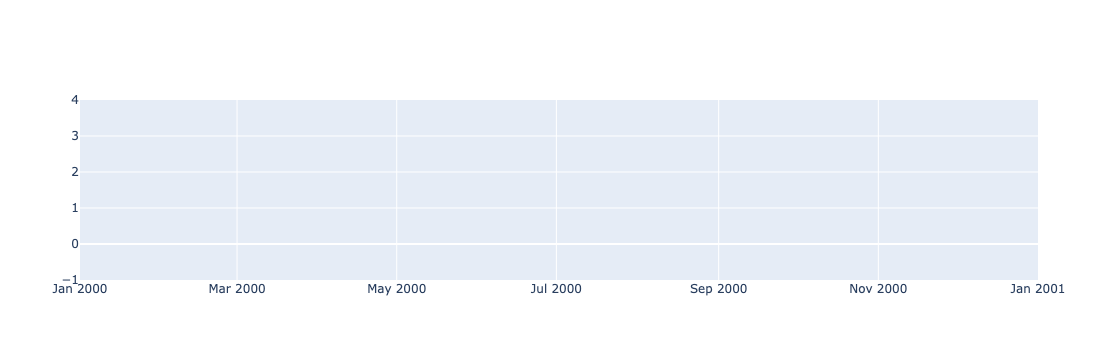

In [135]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(
                x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'], 
                close=df['AAPL.Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [129]:
df

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0    2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1    2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2    2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3    2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4    2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   
..          ...         ...         ...         ...         ...          ...   
501  2017-02-10  132.460007  132.940002  132.050003  132.119995     20065500   
502  2017-02-13  133.080002  133.820007  132.750000  133.289993     23035400   
503  2017-02-14  133.470001  135.089996  133.250000  135.020004     32815500   
504  2017-02-15  135.520004  136.270004  134.619995  135.509995     35501600   
505  2017-02-16  135.669998  135.899994  134.839996  135.350006     22118000   

     AAPL.Adjusted          dn        mavg          up   direction  
0       122.905254  106.741052  117.927667  129.114281  Increasing  
1       123.760965  107.842423  118.940333  130.038244  Increasing  
2       123.501363  108.894245  119.889167  130.884089  Decreasing  
3       124.510914  109.785449  120.763500  131.741551  Increasing  
4       127.876074  110.372516  121.720167  133.067817  Increasing  
..             ...         ...         ...         ...         ...  
501     132.119995  114.494004  124.498666  134.503328  Decreasing  
502     133.289993  114.820798  125.205166  135.589534  Increasing  
503     135.020004  115.175718  125.953499  136.731280  Increasing  
504     135.509995  115.545035  126.723499  137.901963  Decreasing  
505     135.350006  116.203299  127.504333  138.805366  Decreasing  

[506 rows x 11 columns]